In [1]:
#Betow_Jude
#05/03/2024
#UMAP exercise with some ANPDB curated data
#The dataframe contains molecules from northern africa, southern africa and central africa. From their SMILES, the molecules were prepared and their phyisicochemical properties were calculated using the Schrodinger suite.

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
#Reading data from Central Africa and data cleaning
ca_df=pd.read_csv('qikprop_Family_CA_1.CSV')

In [4]:
ca_df

,molecule,region,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm
0,CA_ACHA_00002.mol,CAF,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,80.915,4.0,0.0,24.0,0.0,24.0,20.0,33.0,0.0,0.002
1,CA_ACHA_00003.mol,CAF,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.0,...,100.533,5.0,0.0,24.0,0.0,24.0,20.0,34.0,0.0,0.001
2,CA_ACHA_00004.mol,CAF,0.0,0.0,0.0,2.0,0.0,2.0,1.0,-2.0,...,105.663,5.0,1.0,22.0,0.0,22.0,21.0,35.0,2.0,0.000
3,CA_ACHA_00004.mol,CAF,0.0,0.0,0.0,2.0,0.0,2.0,1.0,-2.0,...,106.086,5.0,1.0,22.0,0.0,22.0,21.0,35.0,2.0,0.000
4,CA_ACHA_00004.mol,CAF,0.0,0.0,0.0,2.0,0.0,2.0,1.0,-2.0,...,106.128,5.0,1.0,22.0,0.0,22.0,21.0,35.0,2.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,CA_APOC_00115.mol,CAF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,39.744,3.0,0.0,17.0,0.0,15.0,4.0,21.0,0.0,0.214
1377,CA_APOC_00118.mol,CAF,4.0,0.0,0.0,1.0,0.0,3.0,1.0,-1.0,...,64.038,4.0,1.0,22.0,0.0,22.0,20.0,35.0,1.0,0.000
1378,CA_APOC_00118.mol,CAF,4.0,0.0,0.0,1.0,0.0,3.0,1.0,-1.0,...,64.344,4.0,1.0,22.0,0.0,22.0,20.0,35.0,1.0,0.000
1379,CA_APOC_00118.mol,CAF,4.0,0.0,0.0,1.0,0.0,3.0,1.0,-1.0,...,65.576,4.0,1.0,22.0,0.0,22.0,20.0,35.0,1.0,0.000


In [5]:
ca_df=ca_df.sort_values('mol_MW', ascending=True)

In [6]:
ca_df

,molecule,region,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm
1128,CA_APOC_00060.mol,CAF,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,49.993,2.0,0.0,6.0,0.0,6.0,0.0,11.0,0.0,9.640
1129,CA_APOC_00060.mol,CAF,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,49.052,2.0,0.0,6.0,0.0,6.0,0.0,11.0,0.0,11.223
467,CA_ANAC_00026.mol,CAF,0.0,0.0,0.0,0.0,0.0,4.0,1.0,-2.0,...,94.980,5.0,0.0,6.0,0.0,6.0,0.0,13.0,0.0,0.232
466,CA_ANAC_00026.mol,CAF,0.0,0.0,0.0,0.0,0.0,4.0,1.0,-2.0,...,95.184,5.0,0.0,6.0,0.0,6.0,0.0,13.0,0.0,0.217
465,CA_ANAC_00026.mol,CAF,0.0,0.0,0.0,0.0,0.0,4.0,1.0,-2.0,...,95.451,5.0,0.0,6.0,0.0,6.0,0.0,13.0,0.0,0.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,CA_APOC_00077.mol,CAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168,CA_APOC_00077.mol,CAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,CA_APOC_00077.mol,CAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,CA_APOC_00077.mol,CAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ca_df=ca_df.drop_duplicates("molecule", keep="first")

In [8]:
ca_df=ca_df.dropna()

In [9]:
#Reading data from Northern Africa and data cleaning
na_df=pd.read_csv('NA_sheet_A_qikprop_1.CSV')

In [10]:
na_df

,molecule,region,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm
0,NA_ACAN_00003.mol,NAF,0,0,0,0,1,4,0,-1,...,74.464,4,0,11,0,11,3,15,0,39.842
1,NA_ACAN_00003.mol,NAF,0,0,0,0,1,4,0,-1,...,75.846,4,0,11,0,11,3,15,0,35.990
2,NA_ACAN_00005.mol,NAF,0,0,0,0,0,8,3,-2,...,129.029,9,0,16,3,13,11,24,0,20.389
3,NA_ACAN_00005.mol,NAF,0,0,0,0,0,8,3,-2,...,128.960,9,0,16,3,13,11,24,0,16.173
4,NA_ACAN_00006.mol,NAF,8,0,0,0,0,20,3,-2,...,221.988,15,3,24,0,24,10,46,1,0.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NA_ASTE_00147.mol,NAF,0,0,0,0,0,5,2,-2,...,119.928,6,0,13,0,10,8,25,0,0.052
397,NA_ASTE_00147.mol,NAF,0,0,0,0,0,5,2,-1,...,117.786,6,0,13,0,10,8,25,0,1.386
398,NA_ASTE_00149.mol,NAF,0,0,0,0,0,2,1,0,...,78.741,4,0,13,0,10,9,19,0,0.271
399,NA_ASTE_00149.mol,NAF,0,0,0,0,0,2,1,0,...,76.821,4,0,13,0,10,9,19,0,0.184


In [11]:
na_df=na_df.dropna()

In [12]:
na_df=na_df.drop_duplicates("molecule", keep="first")

In [13]:
#Reading data from Southern Africa and data cleaning
sa_df=pd.read_csv('SA_qikprop_1.CSV')

In [14]:
sa_df

,molecule,region,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm
0,SA_ANAC_00001.mol,SAF,4,0,0,1,0,18,0,-2,...,89.593,4,1,6,0,6,0,28,1,0.000
1,SA_ANAC_00012.mol,SAF,6,0,0,0,0,15,1,-2,...,177.910,8,2,24,0,24,0,38,3,0.000
2,SA_ANAC_00012.mol,SAF,4,0,0,0,0,15,1,-2,...,176.541,8,2,24,0,24,0,38,3,0.000
3,SA_ANAC_00012.mol,SAF,6,0,0,0,0,15,1,-2,...,178.059,8,2,24,0,24,0,38,3,0.000
4,SA_ANAC_00012.mol,SAF,6,0,0,0,0,15,1,-2,...,178.676,8,2,24,0,24,0,38,3,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,SA_RUTA_00010.mol,SAF,0,0,0,0,0,5,0,1,...,44.085,5,0,13,0,13,0,23,1,1.812
348,SA_RUTA_00011.mol,SAF,0,0,0,0,0,5,0,1,...,42.914,5,0,13,0,13,0,23,1,9.022
349,SA_RUTA_00011.mol,SAF,0,0,0,0,0,5,0,1,...,42.739,5,0,13,0,13,0,23,1,9.124
350,SA_SIMA_00001.mol,SAF,1,0,0,0,0,1,1,-1,...,113.451,6,0,17,0,17,10,24,0,0.312


In [15]:
sa_df=sa_df.dropna()

In [16]:
sa_df=sa_df.sort_values('mol_MW', ascending=True)

In [17]:
sa_df=sa_df.drop_duplicates("molecule", keep="first")

In [18]:
sa_df

,molecule,region,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm
40,SA_DICH_00001.mol,SAF,8,1,0,1,0,2,0,-1,...,61.882,3,0,0,0,0,0,7,0,0.361
182,SA_GUNN_00007.mol,SAF,0,0,0,1,0,4,2,-2,...,97.506,4,0,6,0,6,0,13,0,1.043
23,SA_ASPA_00023.mol,SAF,0,0,0,0,0,3,1,0,...,63.819,3,0,10,0,10,0,14,0,2.988
41,SA_DICH_00003.mol,SAF,3,2,0,2,0,9,0,-2,...,147.381,6,1,0,0,0,0,14,1,0.000
181,SA_GUNN_00006.mol,SAF,3,0,0,2,0,9,0,-2,...,177.227,8,1,0,0,0,0,14,1,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,SA_CLUS_00002.mol,SAF,6,0,0,0,0,10,1,-2,...,271.240,15,3,32,0,32,2,46,2,0.000
175,SA_FABA_00147.mol,SAF,8,0,0,0,0,8,0,-1,...,80.732,7,2,32,0,32,5,49,2,0.000
8,SA_ASPA_00004.mol,SAF,8,0,0,0,0,8,7,-2,...,231.868,14,2,29,0,29,19,52,1,0.000
12,SA_ASPA_00009.mol,SAF,9,0,0,0,0,9,6,-2,...,230.347,14,2,29,0,29,22,52,1,0.000


In [19]:
#Merging dataframes
dfs=[ca_df, na_df, sa_df]
combined_df=pd.concat(dfs, axis=0)

In [20]:
combined_df

,molecule,region,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm
1128,CA_APOC_00060.mol,CAF,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,49.993,2.0,0.0,6.0,0.0,6.0,0.0,11.0,0.0,9.640
467,CA_ANAC_00026.mol,CAF,0.0,0.0,0.0,0.0,0.0,4.0,1.0,-2.0,...,94.980,5.0,0.0,6.0,0.0,6.0,0.0,13.0,0.0,0.232
713,CA_ANCI_00024.mol,CAF,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,69.358,3.0,0.0,10.0,0.0,10.0,3.0,14.0,0.0,0.931
555,CA_ANAC_00049.mol,CAF,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,76.510,4.0,0.0,10.0,0.0,10.0,2.0,14.0,0.0,2.126
774,CA_ANCI_00056.mol,CAF,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,...,79.670,4.0,0.0,10.0,0.0,10.0,0.0,15.0,0.0,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,SA_CLUS_00002.mol,SAF,6.0,0.0,0.0,0.0,0.0,10.0,1.0,-2.0,...,271.240,15.0,3.0,32.0,0.0,32.0,2.0,46.0,2.0,0.000
175,SA_FABA_00147.mol,SAF,8.0,0.0,0.0,0.0,0.0,8.0,0.0,-1.0,...,80.732,7.0,2.0,32.0,0.0,32.0,5.0,49.0,2.0,0.000
8,SA_ASPA_00004.mol,SAF,8.0,0.0,0.0,0.0,0.0,8.0,7.0,-2.0,...,231.868,14.0,2.0,29.0,0.0,29.0,19.0,52.0,1.0,0.000
12,SA_ASPA_00009.mol,SAF,9.0,0.0,0.0,0.0,0.0,9.0,6.0,-2.0,...,230.347,14.0,2.0,29.0,0.0,29.0,22.0,52.0,1.0,0.000


In [21]:
combined_df.columns

Index(['molecule', 'region', '#stars', '#amine', '#amidine', '#acid', '#amide',
       '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA',
       'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V',
       'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw',
       'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB',
       'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa',
       'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine',
       'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34',
       '#in56', '#noncon', '#nonHatm', 'RuleOfThree', 'Jm'],
      dtype='object')

In [22]:
combined_df.molecule.value_counts()

molecule
CA_APOC_00060.mol    1
NA_ASTE_00149.mol    1
NA_ASTE_00096.mol    1
NA_ASTE_00101.mol    1
NA_ASTE_00103.mol    1
                    ..
NA_ACAN_00006.mol    1
NA_ACAN_00009.mol    1
NA_ACAN_00022.mol    1
NA_ACAN_00023.mol    1
SA_HYAC_00010.mol    1
Name: count, Length: 587, dtype: int64

In [23]:
combined_df.shape

(587, 53)

In [24]:
#Dimensionality reduction
import umap

/home/compchem/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
reducer=umap.UMAP()

In [26]:
df_data=combined_df[
    ['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor',
       '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA',
       'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA',
       'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w',
       'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK',
       'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa',
       'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine',
       'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34',
       '#in56', '#noncon', '#nonHatm', 'RuleOfThree', 'Jm'
    ]
].values
scaled_df_data=StandardScaler().fit_transform(df_data)

In [27]:
embedding = reducer.fit_transform(scaled_df_data)

In [28]:
embedding.shape

(587, 2)

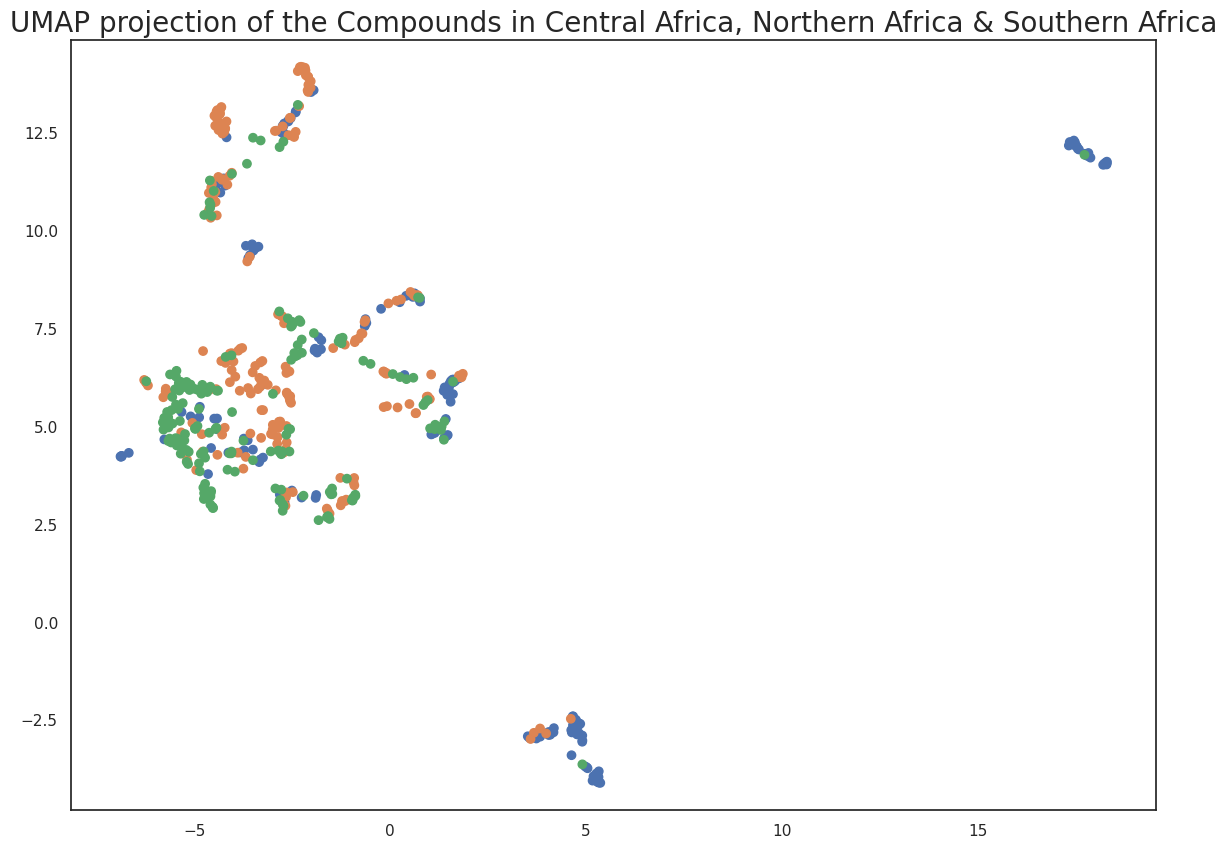

In [33]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in combined_df.region.map({'CAF':0, 'NAF':1, 'SAF':2})]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Compounds in Central Africa, Northern Africa & Southern Africa', fontsize=20);

In [34]:
embedding

array([[-3.724892 ,  4.385085 ],
       [-3.733266 ,  4.683671 ],
       [-3.6337113,  4.640465 ],
       ...,
       [-2.7231386, 12.264288 ],
       [-2.8202307, 12.125118 ],
       [-2.354722 , 13.203442 ]], dtype=float32)